<h1>Tarea</h1>
<h3>Optimización de la Experiencia de Compra en Instacart: Un Análisis de Árboles de Decisiones, Random Forest y Gradient Boosting</h3>

<b>Integrantes:</b>
- Adrián Bedón
- Jairo Bedón
- Andrea Cobos
- Xavier Ramos

<h1>Contexto</h1>

El propósito de este proyecto es prever qué productos comprarán los usuarios en el futuro, basándonos en las características del conjunto de datos creado durante la fase de limpieza de datos. Utilizando un conjunto de variables seleccionadas y procesadas cuidadosamente, buscamos anticipar las decisiones de compra de los usuarios. Al analizar estas características y su relación con el comportamiento de compra pasado, podemos desarrollar modelos predictivos que nos ayuden a comprender y pronosticar qué productos es más probable que los usuarios adquieran en el futuro. Este enfoque nos permite tomar decisiones informadas sobre la gestión de inventario, personalización de recomendaciones y estrategias de marketing, lo que mejora la experiencia del usuario y aumenta la eficiencia de los servicios que ofrece Instacart.

El conjunto de datos consta de los pedidos de 200,000 usuarios, con cada uno realizando entre 4 y 100 pedidos. Nuestro objetivo es predecir qué productos previamente comprados estarán en el próximo pedido de un usuario. Cada usuario ha comprado varios productos en pedidos anteriores, y tenemos información sobre el order_id de su próximo pedido. Este problema se trata de clasificación, ya que necesitamos prever si cada usuario comprará nuevamente ciertos productos o no, lo cual está indicado por la variable reordered, siendo reordered=1 o reordered=0.

Como resultado, hemos identificado varias variables predictoras que describen las características de un producto y el comportamiento del usuario con respecto a uno o varios productos. Estas nuevas variables se generaron al analizar los pedidos anteriores del conjunto de datos.

<h1>Asignación</h1>

Después de revisar el cuaderno sobre "Optimización de la Experiencia de Compra en Instacart mediante Análisis de Árboles de Decisión, Bosques Aleatorios y Impulso Gradiente", tu tarea consiste en implementar dos modelos basados en los métodos mencionados. Debes fusionar árboles de decisión, bosques aleatorios e impulso gradiente. Posteriormente, evalúa y compara ambos modelos para seleccionar el más eficaz. Finalmente, prueba el modelo seleccionado en el conjunto de datos de pruebas para determinar los productos que necesitan ser reordenados.


<h2>Código en Python</h2>

En esta sección, es fundamental cargar las diferentes bibliotecas que se utilizarán en el estudio para garantizar un análisis efectivo y eficiente de los datos. A continuación, se proporciona un ejemplo de cómo podrías cargar estas bibliotecas en Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn import tree
from sklearn import ensemble
from sklearn import model_selection

import itertools

Después, procedemos a cargar los datos utilizando la biblioteca Pandas. Puedes descargar los datos desde el aula virtual o el repositorio de <a href='https://drive.google.com/file/d/1ev8BAm9SEttmnwT-2gxik4_Y230UqWl1/view?usp=drive_link'>data</a>, dependiendo de tu preferencia. 

In [2]:
df = pd.read_csv(r'C:\Users\arbed\Downloads\user_prod_train.csv\user_prod_train.csv')

Después de cargar los datos, es importante verificar su calidad y realizar cualquier limpieza necesaria para garantizar la precisión de nuestro análisis. Aquí tienes algunos pasos comunes que podríamos realizar para verificar y limpiar los datos:

Verificar la estructura de los datos: Revisar la forma del DataFrame, el tipo de datos de cada columna y la presencia de valores faltantes.

Manejo de valores faltantes: Decidir cómo manejar los valores faltantes, ya sea eliminándolos, imputándolos con algún valor, o utilizando técnicas más avanzadas como el imputado mediante modelos.

Corrección de tipos de datos: Convertir los tipos de datos según sea necesario para el análisis.

Definir un Random Seed para

In [3]:
RANDOMSEED = 42

<h1>Divide tu data para entrenar el modelo y poder hacer pruebas de los modelos</h1>

In [4]:
X_train, X_val, y_train, y_val = train_test_split(df.drop('reordered', axis=1), df.reordered, test_size=0.2, random_state=RANDOMSEED)

<h1>Funciones para evaluar los modelos y graficar</h1>

Revisa las funciones que utilizamos para evaluar los modelos.

In [5]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Comparar el rendimiento del modelo de aprendizaje automático con la referencia. Calculo estadísticos y Muestra de la curva ROC."""
    
    baseline = {}
    
    baseline['acurracy'] = accuracy_score(y_val, [1 for _ in range(len(y_val))])
    baseline['recall'] = recall_score(y_val, [1 for _ in range(len(y_val))])
    baseline['precision'] = precision_score(y_val, [1 for _ in range(len(y_val))])
    baseline['f1_score'] = f1_score(y_val, [1 for _ in range(len(y_val))])
    baseline['roc'] = 0.5
    baseline['gini'] = 2 * baseline['roc'] - 1
    
    results = {}
    results['acurracy'] = accuracy_score(y_val, predictions)
    results['recall'] = recall_score(y_val, predictions)
    results['precision'] = precision_score(y_val, predictions)
    results['f1_score'] = f1_score(y_val, predictions)
    results['roc'] = roc_auc_score(y_val, probs)
    results['gini'] = 2 * results['roc'] - 1

    train_results = {}
    train_results['acurracy'] = accuracy_score(y_train, train_predictions)
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['f1_score'] = f1_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    train_results['gini'] = 2 * train_results['roc'] - 1

    for metric in ['acurracy', 'recall', 'precision', 'f1_score', 'roc', 'gini']:
        display(
            f'Base de comparación {metric.capitalize()}: {round(baseline[metric], 2)} '
            f'Prueba: {round(results[metric], 2)} '
            f'Entrenamiento: {round(train_results[metric], 2)}'
        )

    #Calcular tasas de falsos positivos y tasas de verdaderos positivos.
    base_fpr, base_tpr, _ = roc_curve(y_val, [1 for _ in range(len(y_val))])
    model_fpr, model_tpr, _ = roc_curve(y_val, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    plt.plot(base_fpr, base_tpr, 'b', label = 'Base de comparación')
    plt.plot(model_fpr, model_tpr, 'r', label = 'Modelo')
    plt.legend()
    plt.xlabel('Tasa de Falsos Positivos'); plt.ylabel('Tasa de Verdaderos Positivos'); plt.title('Curva ROC')

def plot_confusion_matrix(predictions):

    cm = confusion_matrix(y_val, predictions)
    classes = ['Sin reorden', 'Con reorden']

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Matriz de confusión', size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta predicha')

def plot_features(model):
    feat = list(X_train.columns)
    fi = pd.DataFrame({'feature': feat,
                    'importance': model.feature_importances_}).\
                        sort_values('importance', ascending = False)
    
    x_values = list(range(len(fi['importance'])))
    plt.bar(x_values, fi['importance'], orientation = 'vertical')
    plt.xticks(x_values, fi['feature'], rotation='vertical')
    plt.ylabel('importance')
    plt.xlabel('Características')
    plt.title('Importancias de las características')

def plot_tree(model):
    tree.plot_tree(model, 
                   feature_names=X_train.columns,
                   filled=True)
    plt.show()

<h1>Entrenamiento de los modelos</h1>

Vamos a definir el primer modelo a entrenar. Dado el tamaño de los datos, es recomendable limitar la complejidad del modelo para evitar tiempos de entrenamiento prolongados.

In [6]:
model_simple_tree = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=RANDOMSEED)
model_simple_tree.fit(X_train, y_train)
display(f'El árbol de decisión tiene un score de {model_simple_tree.score(X_val, y_val)}.')

'El árbol de decisión tiene un score de 0.9051372532129589.'

Vamos a determinar los nodos y la profundidad del modelo. Es importante ajustar estos parámetros para equilibrar la capacidad de aprendizaje del modelo y evitar el sobreajuste.

In [7]:
#
display(f'El árbol de decisión tiene {model_simple_tree.tree_.node_count} nodos con profundidad máxima {model_simple_tree.tree_.max_depth}.')


'El árbol de decisión tiene 5 nodos con profundidad máxima 2.'

Vamos a realizar las predicciones de probabilidad y las predicciones para los datos de entrenamiento y de prueba con el primer modelo. Esto nos permitirá evaluar el desempeño del modelo en ambos conjuntos de datos y comprender su capacidad para generalizar a datos no vistos.

In [8]:
train_probs = model_simple_tree.predict_proba(X_train)[:, 1]
probs = model_simple_tree.predict_proba(X_val)[:, 1]

train_predictions = model_simple_tree.predict(X_train)
predictions_tree = model_simple_tree.predict(X_val)

Nos gustaría presentar la evaluación del modelo

¿Podrías explicar lo que entiendes del resultado?

'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 0.91'

'Base de comparación Recall: 1.0 Prueba: 0.23 Entrenamiento: 0.23'

'Base de comparación Precision: 0.1 Prueba: 0.54 Entrenamiento: 0.54'

'Base de comparación F1_score: 0.18 Prueba: 0.32 Entrenamiento: 0.32'

'Base de comparación Roc: 0.5 Prueba: 0.69 Entrenamiento: 0.69'

'Base de comparación Gini: 0.0 Prueba: 0.38 Entrenamiento: 0.38'

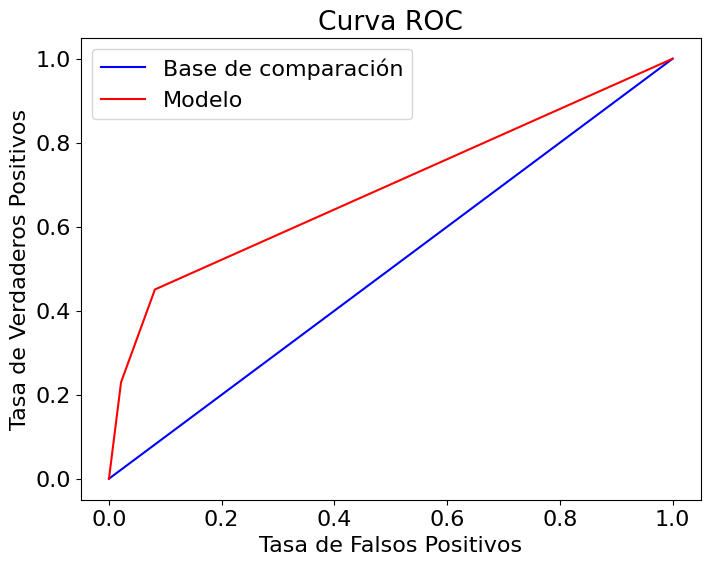

In [9]:
evaluate_model(predictions_tree, probs, train_predictions, train_probs)

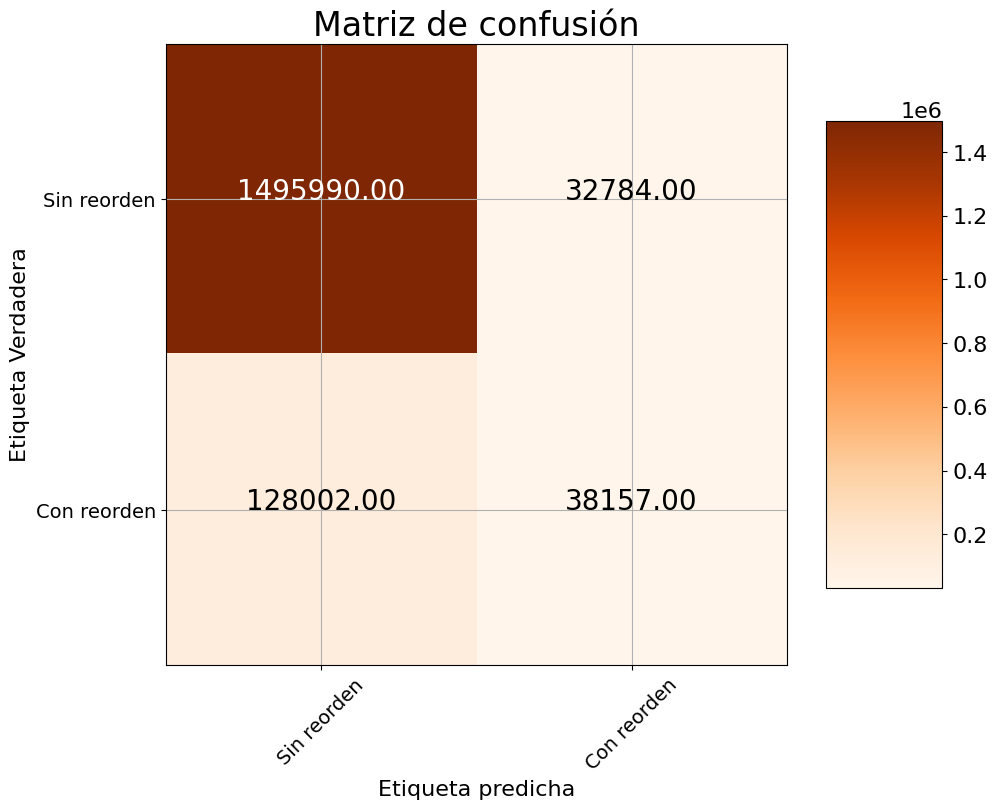

In [10]:
plot_confusion_matrix(predictions_tree)

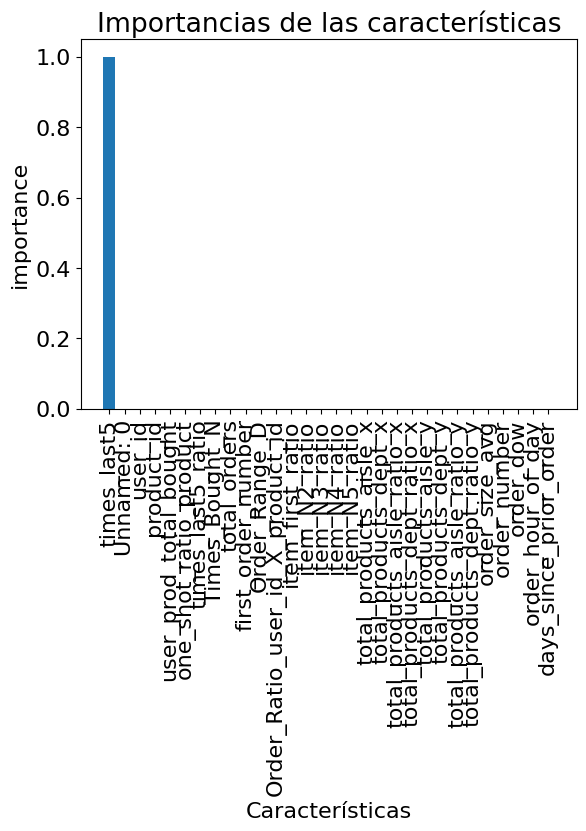

In [11]:
plot_features(model_simple_tree)

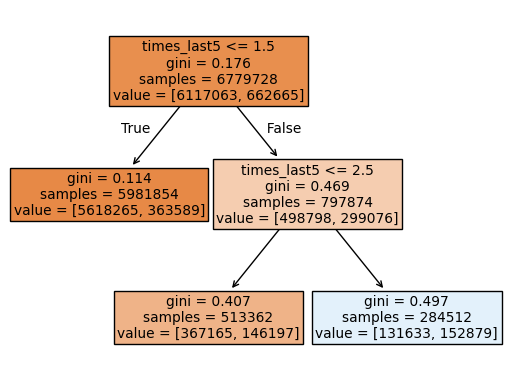

In [12]:
plot_tree(model_simple_tree)

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Al analizar los resultados, se puede observar claramente que el modelo supera en gran medida a la baseline, además al mostrar resultados iguales para entrenamiento y prueba también podemos observar que no existe overfitting o sobreajuste. Sin embargo no deja de ser importante observar que el valor de precision y de recall nos están indicando que existe una cantidad considerable de positivos sin detectar.</i></p>
</div>

Vamos a definir el segundo modelo a entrenar. Dado el tamaño de los datos, es recomendable limitar la complejidad del modelo para evitar tiempos de entrenamiento prolongados.

In [13]:
#
from xgboost import XGBClassifier, plot_tree as xgb_plot_tree

# Modelo XGBoost con GPU
model_xgb = XGBClassifier(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0,
    objective="binary:logistic",
    device = 'cuda',
    tree_method="hist",
    random_state=RANDOMSEED
)

model_xgb.fit(X_train, y_train)

display(f'XGBoost (GPU) tiene un score de {model_xgb.score(X_val, y_val):.4f}.')


c:\Users\arbed\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:774: UserWarning: [23:24:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


'XGBoost (GPU) tiene un score de 0.9090.'

Vamos a determinar los nodos y la profundidad del modelo. Es importante ajustar estos parámetros para equilibrar la capacidad de aprendizaje del modelo y evitar el sobreajuste.

In [14]:
booster = model_xgb.get_booster()
df_trees = booster.trees_to_dataframe()

n_nodos = df_trees.shape[0]
n_arboles = model_xgb.n_estimators
max_depth_real = model_xgb.max_depth

display(
    f'XGBoost tiene {n_nodos} nodos en {n_arboles} árboles, '
    f'con profundidad máxima (parámetro max_depth) {max_depth_real}.'
)


'XGBoost tiene 1500 nodos en 100 árboles, con profundidad máxima (parámetro max_depth) 3.'

Vamos a realizar las predicciones de probabilidad y las predicciones para los datos de entrenamiento y de prueba con el segundo modelo. Esto nos permitirá evaluar el desempeño del modelo en ambos conjuntos de datos y comprender su capacidad para generalizar a datos no vistos.

'Base de comparación Acurracy: 0.1 Prueba: 0.91 Entrenamiento: 0.91'

'Base de comparación Recall: 1.0 Prueba: 0.18 Entrenamiento: 0.18'

'Base de comparación Precision: 0.1 Prueba: 0.63 Entrenamiento: 0.62'

'Base de comparación F1_score: 0.18 Prueba: 0.27 Entrenamiento: 0.28'

'Base de comparación Roc: 0.5 Prueba: 0.83 Entrenamiento: 0.83'

'Base de comparación Gini: 0.0 Prueba: 0.65 Entrenamiento: 0.65'

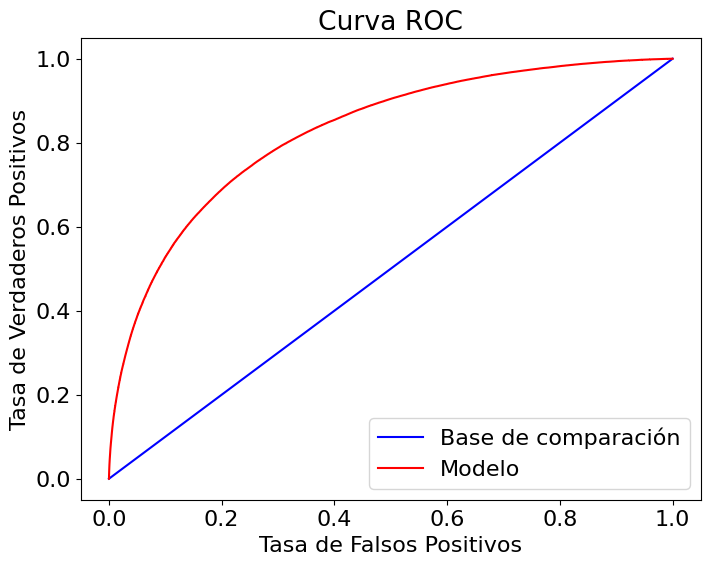

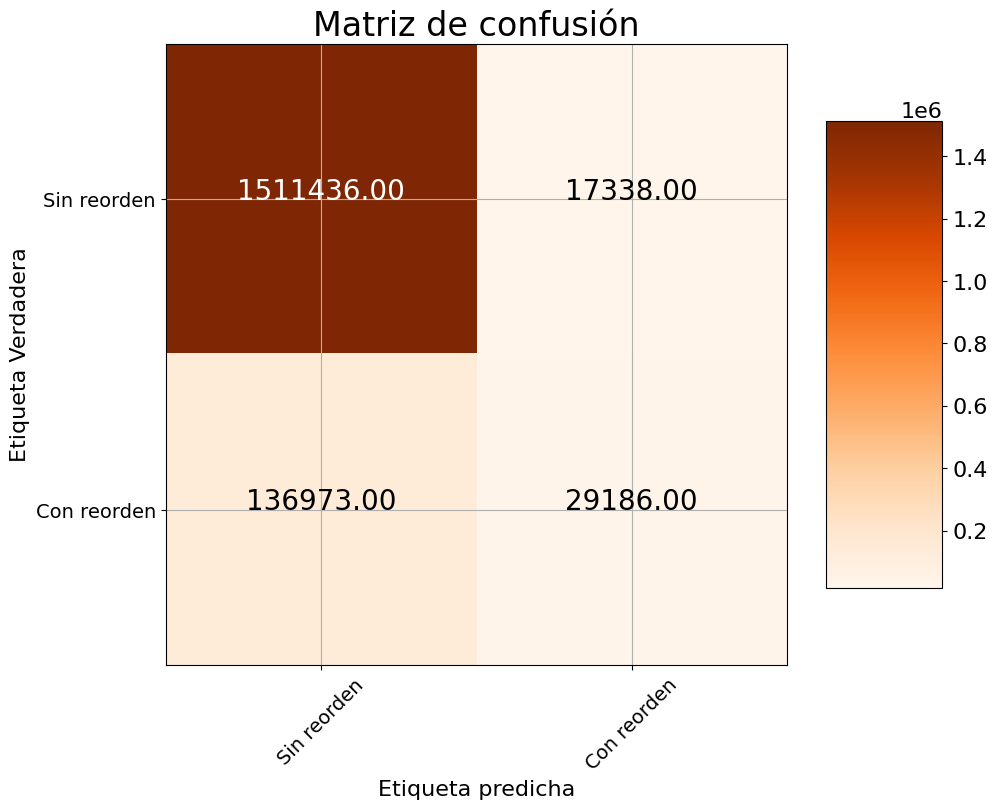

In [15]:
# Probabilidades
train_probs = model_xgb.predict_proba(X_train)[:, 1]
probs = model_xgb.predict_proba(X_val)[:, 1]

# Predicciones
train_predictions = model_xgb.predict(X_train)
predictions_boost = model_xgb.predict(X_val)

# Métricas y curvas (tus funciones originales)
evaluate_model(predictions_boost, probs, train_predictions, train_probs)
plot_confusion_matrix(predictions_boost)


Nos gustaría presentar la evaluación del modelo

¿Podrías explicar lo que entiendes del resulato?

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Para el caso de Grandient Boosting, siendo más específicos en nuestro caso XGBoost, vemos que AUC y Gini mejoran bastante, lo que indica que clasifica mucho mejor que el árbol de decisión anteriormente usado. Pero vemos también que el recall bajó con lo cual perdemos más verdaderos positivos aunque predice menos falsos positivos. Sin embargo para este caso podríamos mejorar el modelo cambiando algunos hiperparámetros.</i></p>
</div>

Vamos a comparar los resultados de ambos modelos y luego explicaremos por qué optamos por utilizar uno sobre el otro. 

In [16]:
def plot_comparison(cms, titles, classes, fmt='d'):
    num_plots = len(cms)
    fig, axes = plt.subplots(1, num_plots, figsize=(10 * num_plots, 10))

    if num_plots == 1:
        axes = [axes]

    tick_marks = np.arange(len(classes))

    for ax, cm, title in zip(axes, cms, titles):
        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)

        ax.set_title(title, size=24)
        fig.colorbar(im, ax=ax, aspect=4)

        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=45, size=14)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes, size=14)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt), fontsize=20,
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
            
        ax.grid(None)
        ax.set_ylabel('Etiqueta Verdadera')
        ax.set_xlabel('Etiqueta predicha')
    
    plt.tight_layout()
    plt.show()

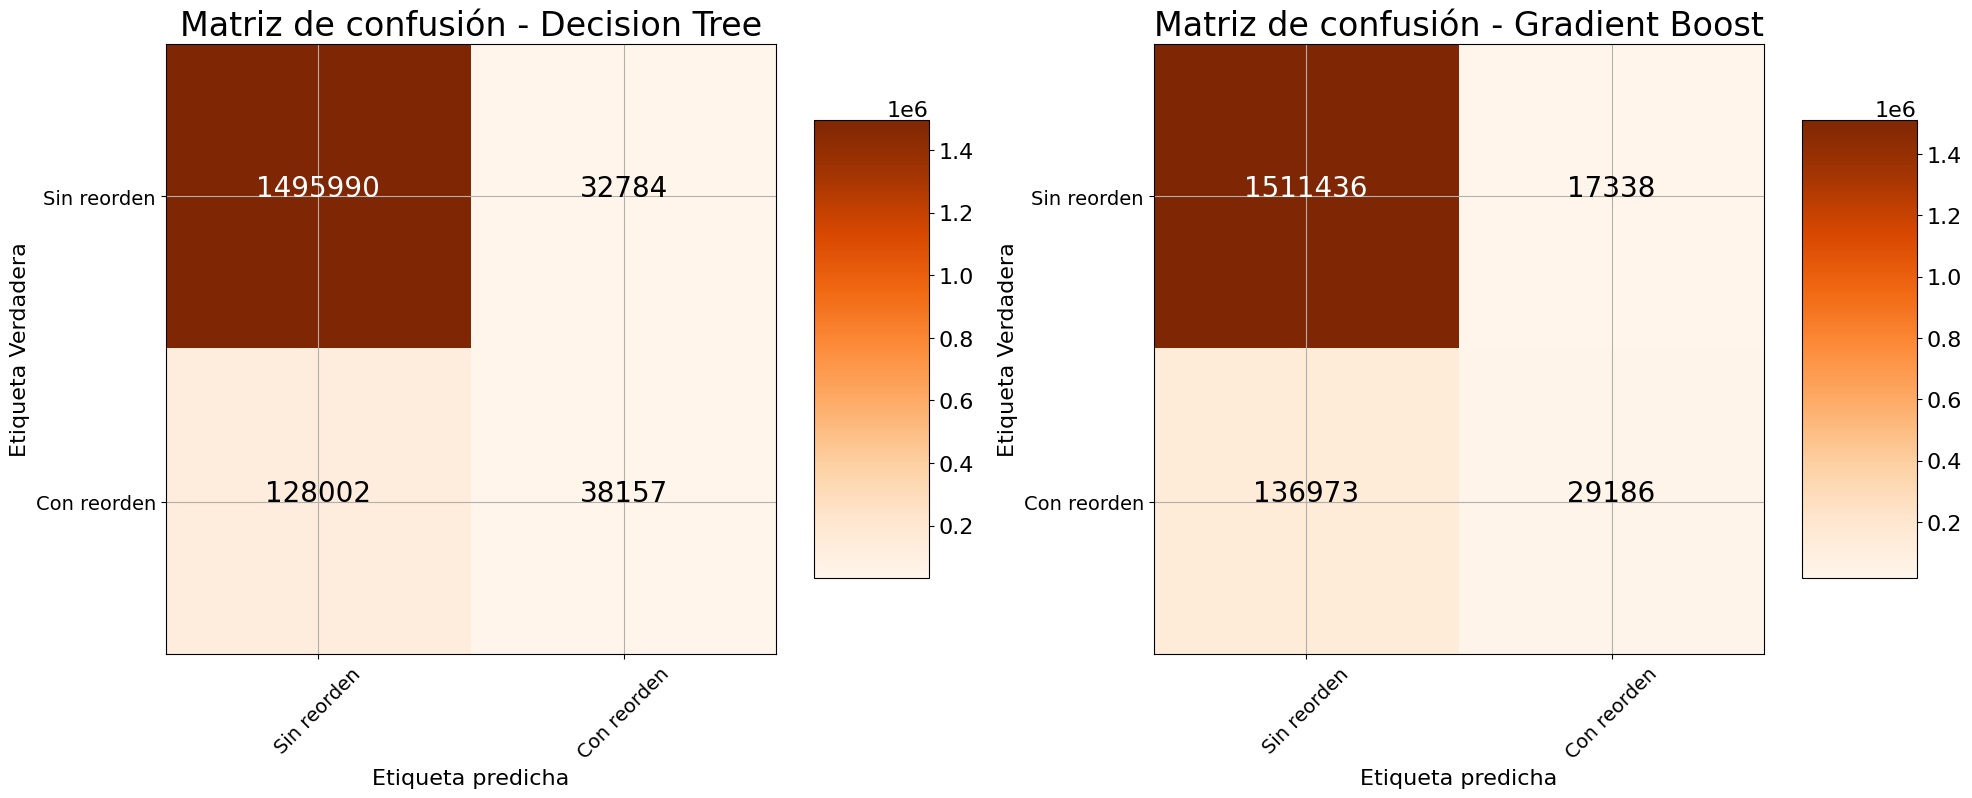

In [17]:
cm_tree = confusion_matrix(y_val, predictions_tree)
cm_boost = confusion_matrix(y_val, predictions_boost)

cms = [cm_tree, cm_boost]
titles = ['Matriz de confusión - Decision Tree', 'Matriz de confusión - Gradient Boost']
classes = ['Sin reorden', 'Con reorden']

plot_comparison(cms, titles, classes)

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Como habíamos indicado en los análisis anteriores, vemos que XGBoost nos permite clasificar mejor la intención de recompra de los clientes, por lo que el sería el modelo indicado para definir estrategias de clasificación de clientes, inventario y campañas dirigidas.</i></p>
</div>

<h1>Prueba del modelo con nuevo datos</h1>

Carga el nuevo conjunto de datos de pruebas, lo puedes descargar desde <a href='https://drive.google.com/file/d/1GfmCmZMKoosYaO_5vZW9NxlrHc1p32wc/view?usp=drive_link'>aqui</a>

In [18]:
df_test = pd.read_csv(r'C:\Users\arbed\Downloads\user_prod_test.csv\user_prod_test.csv')

Vamos a realizar las predicciones de probabilidad y las predicciones para los datos nuevos con el modelo seleccionado. Esto nos permitirá ver el comportamiento del modelo con datos nuevo.

In [19]:
probs = model_xgb.predict_proba(df_test)[:, 1]
predictions_boost = model_xgb.predict(df_test)

Nos gustaría presentar la evaluación del modelo

¿Podrías explicar lo que entiendes del resulato?

In [20]:
df_final = df_test.copy()
df_final['reordered'] = predictions_boost
df_final['probs'] = probs

In [21]:
# Tasas históricas reales
rate_train = y_train.mean()
rate_val = y_val.mean()

# Tasa predicha en nuevos datos
rate_test_pred = df_final['reordered'].mean()

comparison_rates = pd.DataFrame({
    "dataset": ["train_real", "val_real", "test_pred"],
    "positive_rate": [rate_train, rate_val, rate_test_pred]
})

display(comparison_rates)

,dataset,positive_rate
0,train_real,0.097742
1,val_real,0.098033
2,test_pred,0.027766


In [22]:
target_rate = rate_val

thresholds = np.linspace(0.01, 0.99, 500)
rates = []

for t in thresholds:
    rate = (df_final['probs'] >= t).mean()
    rates.append(rate)

rates = np.array(rates)

best_idx = np.argmin(np.abs(rates - target_rate))
best_threshold = float(thresholds[best_idx])
best_rate = float(rates[best_idx])

df_threshold_result = pd.DataFrame({
    "target_rate (val)": [round(target_rate, 4)],
    "best_threshold": [round(best_threshold, 4)],
    "achieved_rate": [round(best_rate, 4)]
})

display(df_threshold_result)

df_final['reordered_recal'] = (df_final['probs'] >= best_threshold).astype(int)

df_recal_rate = pd.DataFrame({
    "recalibrated_positive_rate": [round(df_final['reordered_recal'].mean(), 4)]
})

display(df_final.head())

print(f"Tasa de positivos después de la recalibración: {df_recal_rate['recalibrated_positive_rate'][0]*100:.2f}%")

,target_rate (val),best_threshold,achieved_rate
0,0.098,0.2535,0.0979


,Unnamed: 0,user_id,product_id,user_prod_total_bought,one_shot_ratio_product,times_last5,times_last5_ratio,Times_Bought_N,total_orders,first_order_number,...,total_products_aisle_ratio_y,total_products_dept_ratio_y,order_size_avg,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,probs,reordered_recal
0,120,3,248.0,1,0.720492,0.0,0.0,1,13,2,...,0.011713,0.126067,6.769231,13,5,15,11.0,0,0.018165,0
1,121,3,1005.0,1,0.687259,1.0,0.2,1,13,10,...,0.017992,0.087848,6.769231,13,5,15,11.0,0,0.047099,0
2,122,3,1819.0,3,0.653128,0.0,0.0,3,13,4,...,0.009922,0.108095,6.769231,13,5,15,11.0,0,0.082715,0
3,123,3,7503.0,1,0.616269,0.0,0.0,1,13,3,...,0.011713,0.126067,6.769231,13,5,15,11.0,0,0.023821,0
4,124,3,8021.0,1,0.559164,0.0,0.0,1,13,2,...,0.006480,0.062087,6.769231,13,5,15,11.0,0,0.025579,0


Tasa de positivos después de la recalibración: 9.79%


<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Dado que la tasa de activación predicha en el conjunto de datos nuevo (2.78%) difería significativamente de la tasa histórica observada en train y test (~9.8%), se procedió a recalibrar el umbral de clasificación. Para ello, se evaluaron distintos puntos de corte sobre las probabilidades predichas, seleccionando aquel que reproduce de mejor manera la tasa histórica de positivos. El umbral resultante fue aproximadamente 0.25, con lo cual la tasa de activación en los datos nuevos se ajusta nuevamente al 9.8%, manteniendo la capacidad de ranking del modelo.</i></p>
</div>

<h1>Discusión y Conclusión</h1>

- El modelo XGBoost entrenado presentó un desempeño estadístico sobresaliente en el conjunto de validación, con un valor de ROC = 0.83 y Gini = 0.65, lo que refleja una alta capacidad de discriminación entre los casos positivos y negativos. Además, la estabilidad entre entrenamiento y validación evidenció ausencia de sobreajuste, lo que confirma la robustez del modelo como herramienta de ranking.
No obstante, al aplicar el modelo directamente sobre el conjunto de datos nuevos, se observó una tasa de activación predicha del 2.78%, significativamente inferior a la tasa histórica real cercana al 9.8% observada en entrenamiento y validación. Este comportamiento no implica una pérdida de calidad del modelo, sino una descalibración del umbral de decisión frente a un cambio en la distribución de probabilidades (score shift) o diferencias estructurales en el nuevo dominio de datos.
Para corregir este efecto, se implementó un proceso de recalibración del umbral, seleccionando el punto de corte que reproduce la tasa histórica de positivos. Con un nuevo umbral aproximado de 0.25, la tasa de activación en los datos nuevos se alineó nuevamente con el comportamiento histórico (~9.8%), manteniendo intacta la capacidad de ranking del modelo.

- Desde el punto de vista funcional, la tasa de activación refleja el porcentaje de clientes a los que se puede realizar una campaña de recompra de productos, de igual manera ayuda al abastecimiento de inventario de los productos con mayor índice de recompra lo cual se podría validar analizando el subconjunto de datos obtenido de este primer modelo.

<h1>Referencia</h1>


 - Revisar el desempeño predictivo del modelo de ML y establecer un umbral de puntuación. (s/f). Amazon.com. https://docs.aws.amazon.com/es_es/machine-learning/latest/dg/step-4-review-model-and-set-cutoff.html
 - ChatGPT (https://chatgpt.com/)